In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score,f1_score

In [65]:
heart = pd.read_csv('D:/R programs/heart.csv')
heart.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [57]:
heart['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [58]:
cor=heart.corr()['DEATH_EVENT'].sort_values()
print(cor.head(5))
print(cor.tail(5))

time                -0.526964
ejection_fraction   -0.268603
serum_sodium        -0.195204
platelets           -0.049139
smoking             -0.012623
Name: DEATH_EVENT, dtype: float64
anaemia                0.066270
high_blood_pressure    0.079351
age                    0.253729
serum_creatinine       0.294278
DEATH_EVENT            1.000000
Name: DEATH_EVENT, dtype: float64


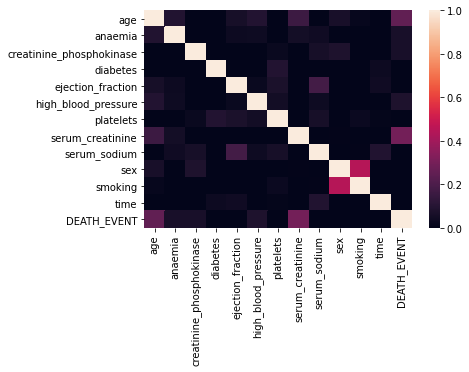

In [59]:
sns.heatmap(heart.corr(),vmin=0,vmax=1)

In [60]:
# Getting the feature importance through random forest classifier

x,y = heart.drop(['DEATH_EVENT'],axis=1),heart['DEATH_EVENT']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('F1 score is',f1_score(y_test,pred))

imp = pd.DataFrame({'Variable': x.columns,'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)
print(imp)

F1 score is 0.6399999999999999
                    Variable  Importance
11                      time    0.382117
7           serum_creatinine    0.161507
4          ejection_fraction    0.102546
0                        age    0.093245
6                  platelets    0.076016
2   creatinine_phosphokinase    0.069682
8               serum_sodium    0.063450
9                        sex    0.012111
1                    anaemia    0.011517
3                   diabetes    0.010574
5        high_blood_pressure    0.008845
10                   smoking    0.008391


Selected variables are time, serum_creatinine,ejection_fraction and age

In [61]:
# Scaling the data for kmeans clustering

heart = heart[['time','ejection_fraction','age','serum_creatinine','DEATH_EVENT']]
scl = MinMaxScaler()
heart['age'] = scl.fit_transform(heart[['age']])
heart['ejection_fraction'] = scl.fit_transform(heart[['ejection_fraction']])
heart['serum_creatinine'] = scl.fit_transform(heart[['serum_creatinine']])
heart['time'] = scl.fit_transform(heart[['time']])

C:\Users\B SRIDHAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


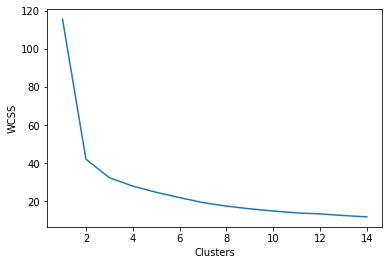

In [62]:
# Elbow plot to get optimal K value
k = range(1,15)
wcss = []
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(heart)
    wcss.append(km.inertia_)

plt.plot(k,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
km = KMeans(n_clusters=2,max_iter=500)
pred = km.fit_predict(heart)
sil_score = silhouette_score(heart, km.labels_,metric='euclidean')
print('Silhouette score is',sil_score)

Silhouette score is 0.5865682028258459


In [64]:
heart['Cluster'] = pred
pd.crosstab(heart.Cluster,heart['DEATH_EVENT'])

DEATH_EVENT,0,1
Cluster,,
0,203,0
1,0,96


Two clusters segmenting the two classes of death event had been obtained